# AE332: Modelling and Analysis Lab 
## Session 4: Simulation of Mechanisms
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scpy
plt.rcParams['text.usetex'] = True
from matplotlib import animation
from IPython.display import HTML

## Problem 1: Compound Pendulum

In [2]:
#Variables
m = 10 # Mass of the Pendulum (kg)
l = 2 # Length of between the pivot and COM (m)
K = 3 # radius of gyration (m^2)
Ip = m*K*K #Moment of Interia (kg . m^2)
g = 9.8 # m/s^2
theta0 = np.radians(60)
thetadot0 = 0 #radians/sec
t= [0, 9]
t_eval = np.linspace(t[0], t[1], 100000)

### Solving in terms of theta only

In [3]:
sol0 = [theta0, thetadot0]
def deriv(t, y):
    thetadot = y[1]
    thetaddot = -m*g*l*np.cos(y[0]) / (Ip + m*l*l)
    return [thetadot, thetaddot]

sol =  scpy.solve_ivp(deriv, t, sol0, t_eval = t_eval, dense_output=True, atol = 1e-9, rtol=1e-9)

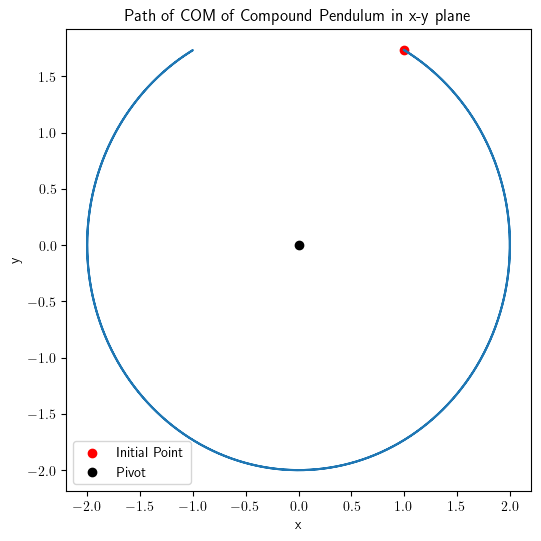

In [4]:
x = l * np.cos(sol.y[0])
y = l * np.sin(sol.y[0])
plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.scatter(l*np.cos(sol.y[0][0]), l*np.sin(sol.y[0][0]),color='red', label='Initial Point')
plt.scatter(0,0, label='Pivot', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Path of COM of Compound Pendulum in x-y plane")
plt.legend()

Text(0.5, 1.0, '$\\dot{\\theta}$')

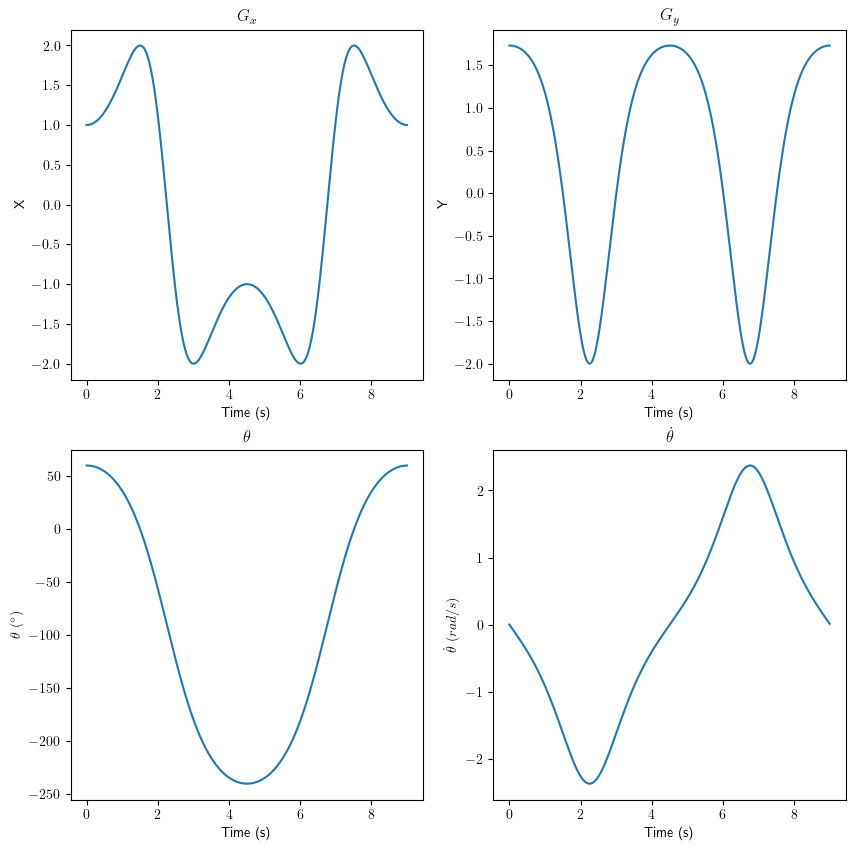

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(sol.t, x)
plt.xlabel('Time (s)')
plt.ylabel('X')
plt.title(r"$G_x$")
plt.subplot(2,2,2)
plt.plot(sol.t, y)
plt.xlabel('Time (s)')
plt.ylabel('Y')
plt.title(r"$G_y$")
plt.subplot(2,2,3)
plt.plot(sol.t, np.degrees(sol.y[0]))
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ $(^\circ)$')
plt.title(r'$\theta$')
plt.subplot(2,2,4)
plt.plot(sol.t, sol.y[1])
plt.xlabel('Time (s)')
plt.ylabel(r'$\dot{\theta}$ $(rad/s)$')
plt.title(r'$\dot{\theta}$')

169.74097914174996 112.53568569541491
Error in Energy:  4.802184093932738e-06


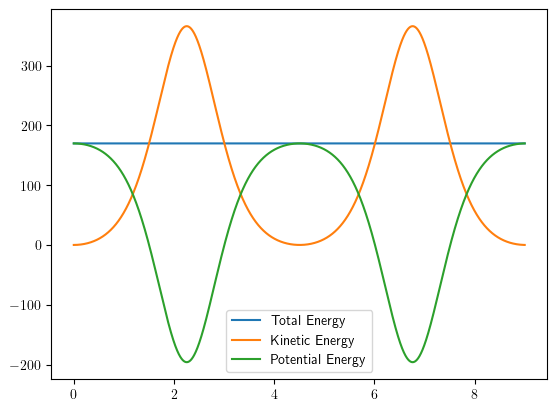

In [6]:
#Calculating the total energy
E0 = m*g*l*np.sin(theta0)
El = 0.5*m*(l*np.max(sol.y[1]))**2
print(E0, El)
E =  m*g*l*np.sin(sol.y[0])+0.5*(Ip+m*l*l)*(sol.y[1]**2) 
print('Error in Energy: ', np.max(E)-np.min(E))
plt.plot(sol.t, E, label='Total Energy')
plt.plot(sol.t, 0.5*(Ip+m*l*l)*(sol.y[1]**2), label='Kinetic Energy')
plt.plot(sol.t, m*g*l*np.sin(sol.y[0]), label='Potential Energy')
plt.legend()

### Solving in terms of x, y, theta

In [7]:

sol0 = [l*np.cos(theta0), 0, l*np.sin(theta0), 0, theta0, thetadot0]
def deriv(t,sol):
    x = sol[0]
    xdot = sol[1]
    y = sol[2]
    ydot = sol[3]
    theta = sol[4]
    thetadot = sol[5]
    A = np.array([[m, 0, 0, -1, 0],
                  [0, m, 0, 0, -1],
                  [0, 0, Ip, -l*np.sin(theta), l*np.cos(theta)],
                  [1, 0, l*np.sin(theta), 0, 0],
                  [0, 1, -l*np.cos(theta), 0, 0]])
    B = np.array([[0], [-m*g], [0], [-l*np.cos(theta)*(thetadot**2)], [-l*np.sin(theta)*(thetadot**2)]])
    X = np.matmul(np.linalg.inv(A),B)
    return [xdot, X[0][0], ydot, X[1][0], thetadot, X[2][0]]

sol =  scpy.solve_ivp(deriv, t, sol0, t_eval = t_eval, dense_output=True, atol = 1e-9, rtol=1e-9)

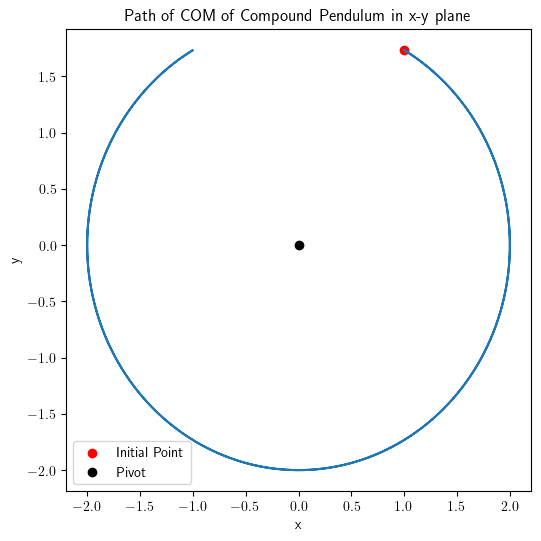

In [8]:
plt.figure(figsize=(6,6))
plt.plot(sol.y[0], sol.y[2])
plt.scatter(sol.y[0][0], sol.y[2][0],color='red', label='Initial Point')
plt.scatter(0,0, label='Pivot', color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Path of COM of Compound Pendulum in x-y plane")
plt.legend()

Text(0.5, 1.0, '$\\dot{\\theta}$')

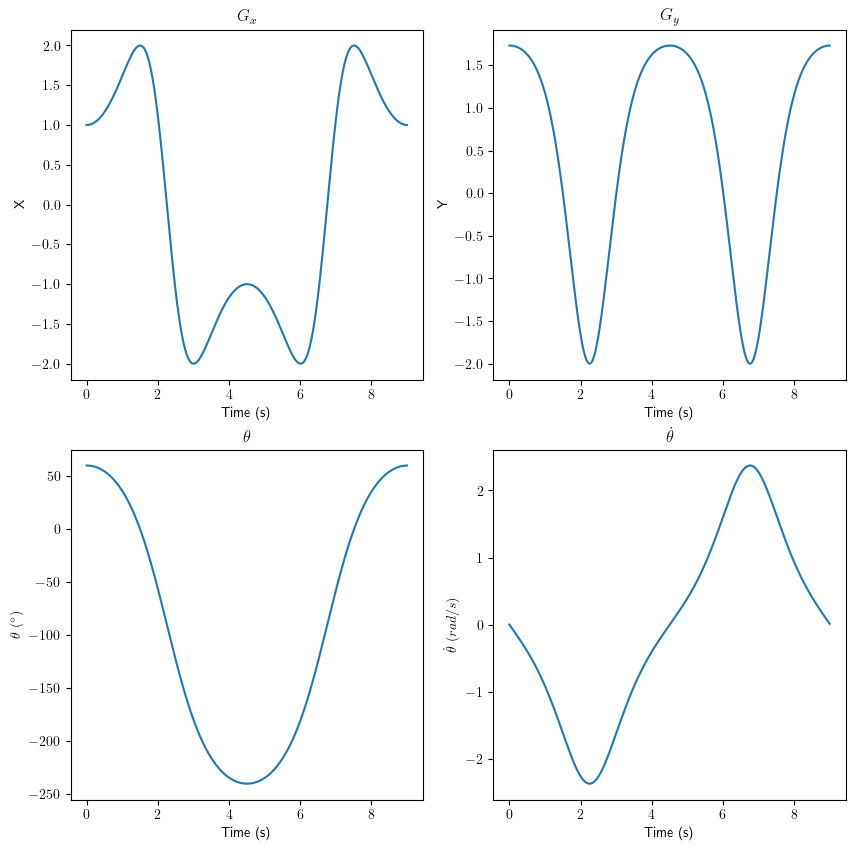

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (s)')
plt.ylabel('X')
plt.title(r"$G_x$")
plt.subplot(2,2,2)
plt.plot(sol.t,sol.y[2])
plt.xlabel('Time (s)')
plt.ylabel('Y')
plt.title(r"$G_y$")
plt.subplot(2,2,3)
plt.plot(sol.t, np.degrees(sol.y[4]))
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ $(^\circ)$')
plt.title(r'$\theta$')
plt.subplot(2,2,4)
plt.plot(sol.t, sol.y[5])
plt.xlabel('Time (s)')
plt.ylabel(r'$\dot{\theta}$ $(rad/s)$')
plt.title(r'$\dot{\theta}$')

169.74097914174996 450.1427434298659
Error in Energy:  2.3788879843777977e-07


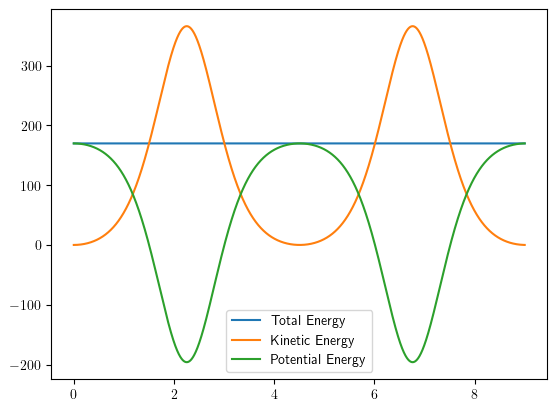

In [10]:
#Calculating the total energy
E0 = m*g*l*np.sin(theta0)
El = 0.5*m*(l*np.max(sol.y[1]))**2
print(E0, El)
E =  m*g*l*np.sin(sol.y[4])+0.5*(Ip+m*l*l)*(sol.y[5]**2) 
print('Error in Energy: ', np.max(E)-np.min(E))
plt.plot(sol.t, E, label='Total Energy')
plt.plot(sol.t, 0.5*(Ip+m*l*l)*(sol.y[5]**2), label='Kinetic Energy')
plt.plot(sol.t, m*g*l*np.sin(sol.y[4]), label='Potential Energy')
plt.legend()

## Problem 2: Compound Pendulum with Spring and Viscous Friction

In this problem, we have assumed that the spring is unstretched intially when the pendulum is released at an angle of 60 degrees from the horizontal. 

The positions of the joints B and C have been assumed as (0.5, 1) and (1.5, 1) respectively, taking the pivot of the pendulum as origin. The natural unstretched length of the spring is 1m. The spring constant of the spring is 500 N/m.

The viscous friction coefficient (b) is assumed to be 2 N.m/s^2. 

In [11]:
K = 500
b = 10
AB = 1
Bx0, By0 = AB*np.cos(theta0), AB*np.sin(theta0)
Cx, Cy = 0.5, 1.5
l0 = 1

### Solving in terms of x, y, theta

In [12]:
sol0 = [l*np.cos(theta0), 0, l*np.sin(theta0), 0, theta0, thetadot0]
def deriv(t,sol):
    x = sol[0]
    xdot = sol[1]
    y = sol[2]
    ydot = sol[3]
    theta = sol[4]
    thetadot = sol[5]
    Bx, By = AB*np.cos(theta), AB*np.sin(theta)
    Sl = np.sqrt((Cx-Bx)**2 + (Cy-By)**2)
    Fs1 = K*(Sl - l0)*(Cx-Bx)/Sl
    Fs2 = K*(Sl - l0)*(Cy-By)/Sl
    tauf = -b*thetadot
    A = np.array([[m, 0, 0, -1, 0],
                  [0, m, 0, 0, -1],
                  [0, 0, Ip, -l*np.sin(theta), +l*np.cos(theta)],
                  [1, 0, l*np.sin(theta), 0, 0],
                  [0, 1, -l*np.cos(theta), 0, 0]])
    B = np.array([[Fs1], [Fs2-m*g], [Fs1*(l-AB)*np.sin(theta) - Fs2*(l-AB)*np.cos(theta) + tauf], [-l*np.cos(theta)*(thetadot**2)], [-l*np.sin(theta)*(thetadot**2)]])
    X = np.matmul(np.linalg.inv(A),B)
    return [xdot, X[0][0], ydot, X[1][0], thetadot, X[2][0]]

sol =  scpy.solve_ivp(deriv, t, sol0, t_eval = t_eval, dense_output=True, atol = 1e-9, rtol=1e-9)

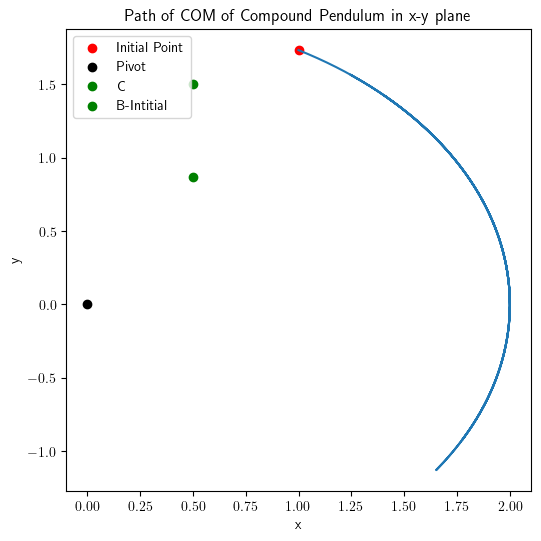

In [13]:
plt.figure(figsize=(6,6))
plt.plot(sol.y[0], sol.y[2])
plt.scatter(sol.y[0][0], sol.y[2][0],color='red', label='Initial Point')
plt.scatter(0,0, label='Pivot', color='k')
plt.scatter(Cx, Cy, label='C', color='g')
plt.scatter(Bx0, By0, label='B-Intitial', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Path of COM of Compound Pendulum in x-y plane")
plt.legend()

Text(0.5, 1.0, '$\\dot{\\theta}$')

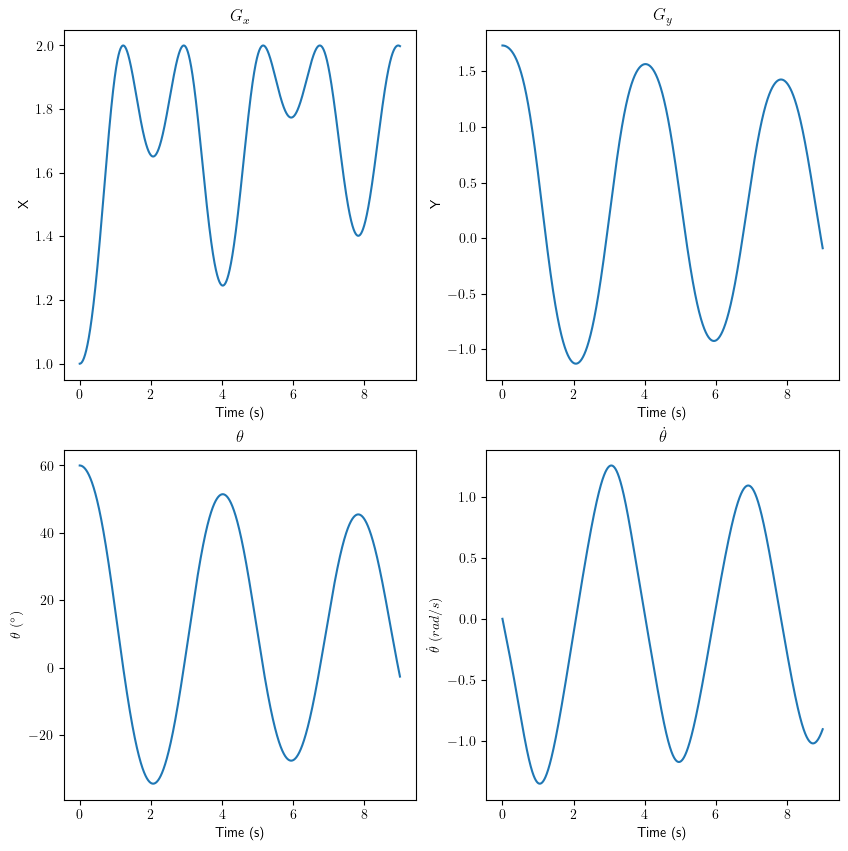

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (s)')
plt.ylabel('X')
plt.title(r"$G_x$")
plt.subplot(2,2,2)
plt.plot(sol.t,sol.y[2])
plt.xlabel('Time (s)')
plt.ylabel('Y')
plt.title(r"$G_y$")
plt.subplot(2,2,3)
plt.plot(sol.t, np.degrees(sol.y[4]))
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ $(^\circ)$')
plt.title(r'$\theta$')
plt.subplot(2,2,4)
plt.plot(sol.t, sol.y[5])
plt.xlabel('Time (s)')
plt.ylabel(r'$\dot{\theta}$ $(rad/s)$')
plt.title(r'$\dot{\theta}$')

### In terms of theta 

In [15]:
sol0 = [theta0, thetadot0]
def deriv(t, y):
    theta = y[0]
    thetadot = y[1]
    Bx, By = AB*np.cos(theta), AB*np.sin(theta)
    Sl = np.sqrt((Cx-Bx)**2 + (Cy-By)**2)
    Fs1 = K*(Sl - l0)*(Cx-Bx)/Sl
    Fs2 = K*(Sl - l0)*(Cy-By)/Sl
    Tauf = -b*thetadot
    thetaddot = (-m*g*l*np.cos(theta) + Tauf - Fs1*AB*np.sin(theta) + Fs2*AB*np.cos(theta)) / (Ip + m*l*l)
    return [thetadot, thetaddot]

sol =  scpy.solve_ivp(deriv, t, sol0, t_eval = t_eval, dense_output=True, atol = 1e-9, rtol=1e-9)

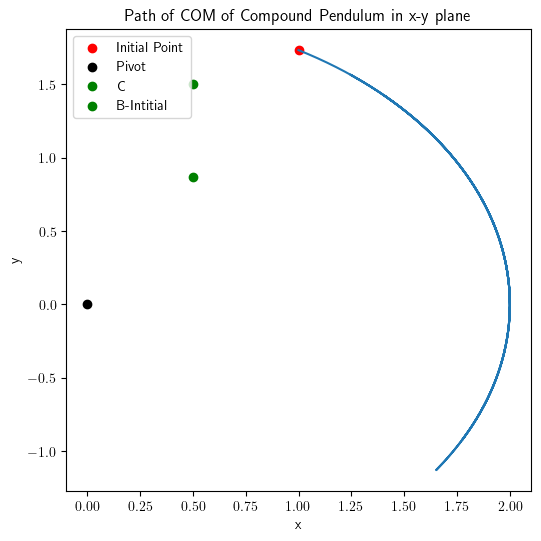

In [16]:
x = l * np.cos(sol.y[0])
y = l * np.sin(sol.y[0])
plt.figure(figsize=(6,6))
plt.plot(x, y)
plt.scatter(x[0], y[0], color='red', label='Initial Point')
plt.scatter(0,0, label='Pivot', color='k')
plt.scatter(Cx, Cy, label='C', color='g')
plt.scatter(Bx0, By0, label='B-Intitial', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Path of COM of Compound Pendulum in x-y plane")
plt.legend()

Text(0.5, 1.0, '$\\dot{\\theta}$')

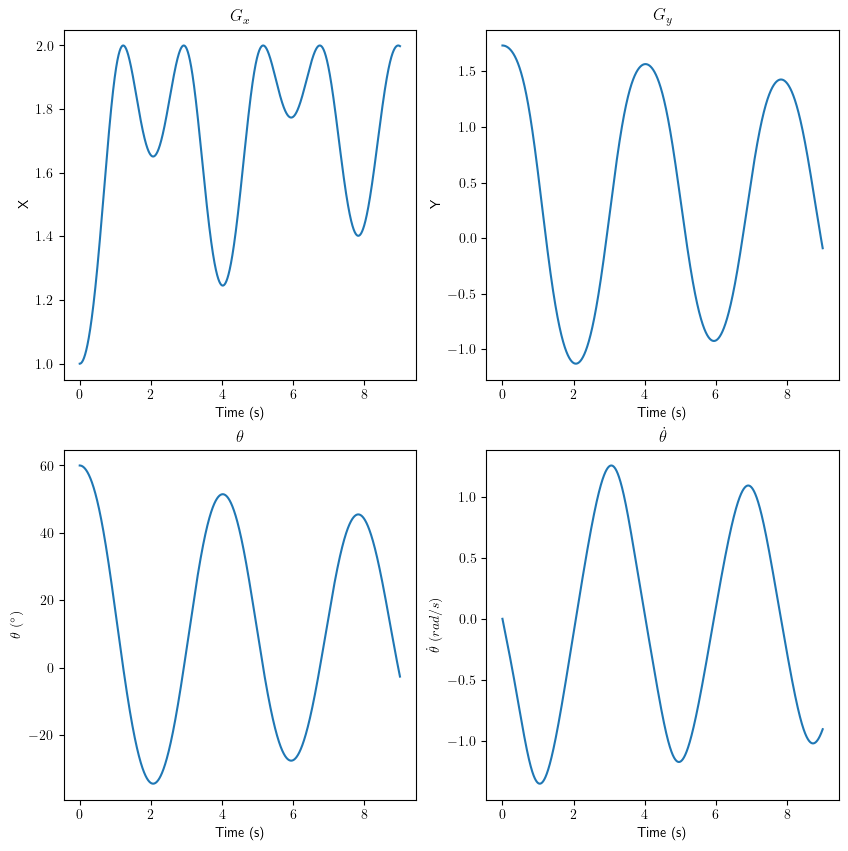

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(sol.t, x)
plt.xlabel('Time (s)')
plt.ylabel('X')
plt.title(r"$G_x$")
plt.subplot(2,2,2)
plt.plot(sol.t, y)
plt.xlabel('Time (s)')
plt.ylabel('Y')
plt.title(r"$G_y$")
plt.subplot(2,2,3)
plt.plot(sol.t, np.degrees(sol.y[0]))
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ $(^\circ)$')
plt.title(r'$\theta$')
plt.subplot(2,2,4)
plt.plot(sol.t, sol.y[1])
plt.xlabel('Time (s)')
plt.ylabel(r'$\dot{\theta}$ $(rad/s)$')
plt.title(r'$\dot{\theta}$')

## Slider Crank Mechanism

In [18]:
l1 = 104.18
l2 = 40
l3 = 80
l4 = 4
a = 3 # distance between the COM and the pivot of the block
m2 = l2 * 0.1
m3 = l3 * 0.1
m4 = 1
I2 = m2 * l2 * l2 /3
I3 = m3 * l3 * l3 /3


### Solving in terms of x2, y2, x3, y3, x4, y4, theta2, theta3

In [32]:
theta20 = np.radians(45)
theta2dot0 = 2
theta30 = np.radians(342)
xg20 = l2*np.cos(theta20)*0.5
yg20 = l2*np.sin(theta20)*0.5
xg30 = l2*np.cos(theta20) + l3*np.cos(theta30)*0.5
yg30 = l2*np.sin(theta20) + l3*np.sin(theta30)*0.5
xg40 = l2*np.cos(theta20) + l3*np.cos(theta30) + a
yg40 = l2*np.sin(theta20) + l3*np.sin(theta30)
xg2dot0 = -l2*theta2dot0*np.sin(theta20)
yg2dot0 = l2*theta2dot0*np.cos(theta20)
sol0 = [xg20, yg20, xg30, yg30, xg40, yg40, theta20, theta30, xg2dot0, yg2dot0, 0, 0, 0, 0, theta2dot0, 0]
xA, yA = 0, 0

def deriv(t, sol):
    xg2, yg2, xg3, yg3, xg4, yg4, theta2, theta3, xg2dot, yg2dot, xg3dot, yg3dot, xg4dot, yg4dot, theta2dot, theta3dot = sol
    xB, yB = l2*np.cos(theta2), l2*np.sin(theta2)
    xC, yC = l2*np.cos(theta2) + l3*np.cos(theta3), l2*np.sin(theta2) + l3*np.sin(theta3)
    xD, yD = xC, xC-1
    mB = np.array([[0], [-m2*g], [0], [-m3*g], [0], [-m4*g], [0], [0], [-0], [-0.5*l2*np.cos(theta2)*theta2dot*theta2dot], 
                   [-0.5*l2*np.sin(theta2)*theta2dot*theta2dot], [-l2*np.cos(theta2)*theta2dot*theta2dot-0.5*l3*np.cos(theta3)*theta3dot*theta3dot],
                   [-l2*np.sin(theta2)*theta2dot*theta2dot-0.5*l3*np.sin(theta3)*theta3dot*theta3dot],
                   [-l2*np.cos(theta2)*theta2dot*theta2dot-l3*np.cos(theta3)*theta3dot*theta3dot],
                   [-l2*np.sin(theta2)*theta2dot*theta2dot-l3*np.sin(theta3)*theta3dot*theta3dot], [0], [0]])
    mA = np.array([
          [m2,0,0,0,0,0,0,0,0,1,0,-1,0,0,0,0,0], #xg2, yg2, xg3, yg3, xg4, yg4, theta2, theta3, theta4, R1, R2, R3, R4,R5, R6, R7,R8
          [0,m2,0,0,0,0,0,0,0,0,1,0,-1,0,0,0,0],
          [0,0,m3,0,0,0,0,0,0,0,0,1,0,-1,0,0,0],
          [0,0,0,m3,0,0,0,0,0,0,0,0,1,0,-1,0,0],
          [0,0,0,0,m4,0,0,0,0,0,0,0,0,1,0,0,0],
          [0,0,0,0,0,m4,0,0,0,0,0,0,0,0,1,-1,0],
          [0,0,0,0,0,0,I2,0,0,-(yA-yg2), (xA-xg2), (yB-yg2), -(xB-xg2), 0,0,0,0],
          [0,0,0,0,0,0,0,I3,0,0,0,-(yB-yg3), (xB-xg3), (yC-yg3), -(xC-xg3),0,0],
          [0,0,0,0,0,0,0,0,0,0,0,0,0,-(yC-yg4),(xC-xg4),-(xD-xg4), 1],
          [1,0,0,0,0,0,0.5*l2*np.sin(theta2),0,0,0,0,0,0,0,0,0,0],
          [0,1,0,0,0,0,-0.5*l2*np.cos(theta2),0,0,0,0,0,0,0,0,0,0],
          [0,0,1,0,0,0,l2*np.sin(theta2),0.5*l3*np.sin(theta3),0,0,0,0,0,0,0,0,0],
          [0,0,0,1,0,0,-l2*np.cos(theta2),-0.5*l3*np.cos(theta3),0,0,0,0,0,0,0,0,0],
          [0,0,0,0,1,0,l2*np.sin(theta2),l3*np.sin(theta3),0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,1,-l2*np.cos(theta2),-l3*np.cos(theta3),0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]])
    X = np.matmul(np.linalg.inv(mA),mB)
    return [xg2dot, yg2dot, xg3dot, yg3dot, xg4dot, yg4dot, theta2dot, theta3dot, X[0][0], X[1][0], X[2][0], X[3][0], X[4][0], X[5][0], X[6][0], X[7][0]]


sol = scpy.solve_ivp(deriv, t, sol0, t_eval = t_eval, dense_output=True, atol = 1e-9, rtol=1e-9)

2089.8


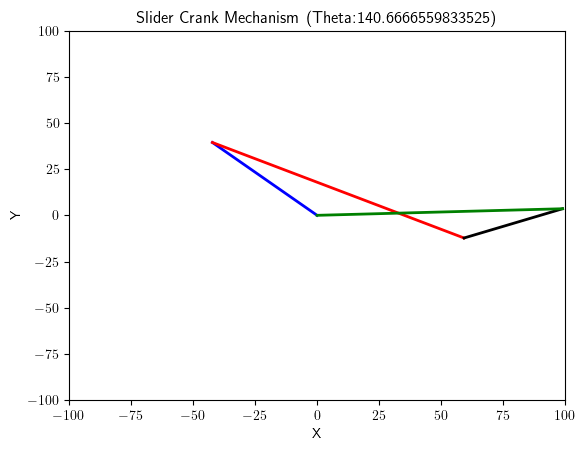

In [20]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel("X")
ax.set_ylabel("Y")
txt_title = ax.set_title('')
line1, = ax.plot([], [], 'b', lw=2, label='AB')     # ax.plot returns a list of 2D line objects
line2, = ax.plot([], [], 'r', lw=2, label='BC')
line3, = ax.plot([], [], 'k', lw=2, label='CD')     # ax.plot returns a list of 2D line objects
line4, = ax.plot([], [], 'g', lw=2, label='DA')
plt.xlim([-100,100])
plt.ylim([-100,100])
def drawframe(n):
    line1.set_data([0,sol.y[0][n*100]],[0,sol.y[1][n*100]])
    line2.set_data([sol.y[0][n*100],sol.y[2][n*100]],[sol.y[1][n*100],sol.y[3][n*100]])
    line3.set_data([sol.y[2][n*100],sol.y[4][n*100]],[sol.y[3][n*100],sol.y[5][n*100]])
    line4.set_data([sol.y[4][n*100],0],[sol.y[5][n*100],0])
    txt_title.set_text("Slider Crank Mechanism (Theta:{})".format(np.degrees(sol.y[6][n*100])))
    return (line1, line2, line3, line4)
print(sol.t.size/10)
anim = animation.FuncAnimation(fig, drawframe, frames=106, interval=20, blit=True)
HTML(anim.to_html5_video())

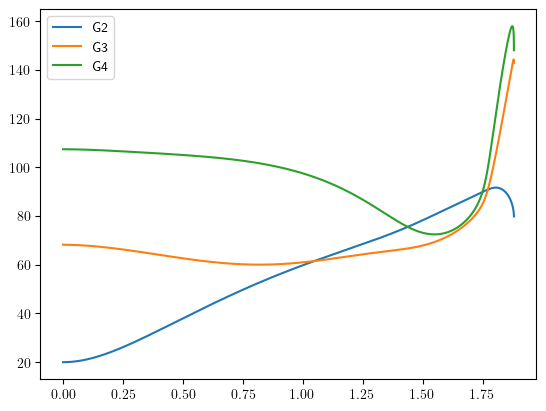

In [21]:
plt.plot(sol.t, np.hypot(sol.y[0], sol.y[1]), label='G2')
plt.plot(sol.t, np.hypot(sol.y[2], sol.y[3]), label='G3')
plt.plot(sol.t, np.hypot(sol.y[4], sol.y[5]), label='G4')
plt.legend()

The integration of the prbblem is stopping as the link length is changing with time.

### Solution in terms of theta only

In [24]:
A, B = 0.3, 0
theta21 = np.radians(0)
theta31 = np.arcsin((B-l2*np.sin(theta21)/l3))
if theta31<0:
    theta31 = 2*np.pi + theta31
s4 = theta21, 2, l2*np.cos(theta21) + l3*np.cos(theta31) + a, 0

In [25]:
def deriv(t, s):
    theta2, theta2dot, x, xdot = s
    S2 , C2 = np.sin(theta2), np.cos(theta2)
    theta3x = np.arcsin((B-l2*S2)/l3)
    S3, C3 = np.sin(theta3x), np.cos(theta3x)
    theta3xdot = -theta2dot*(l2*C2)/(l3*C3)
    dtheta3xdot = (l2*S2*theta2dot**2 + l3*S3*theta3xdot**2)/(l3*C3)
    dxdot = -l2*C2*theta2dot**2 - l3*C3*theta3xdot**2 - l3*S3*dtheta3xdot
    return [theta2dot, 0, xdot, dxdot]

In [30]:
sols1 = scpy.solve_ivp(deriv, (0, 10), s4, t_eval = np.linspace(0, 10, 10000), rtol =1e-10, atol =1e-10)

Text(0, 0.5, 'X4')

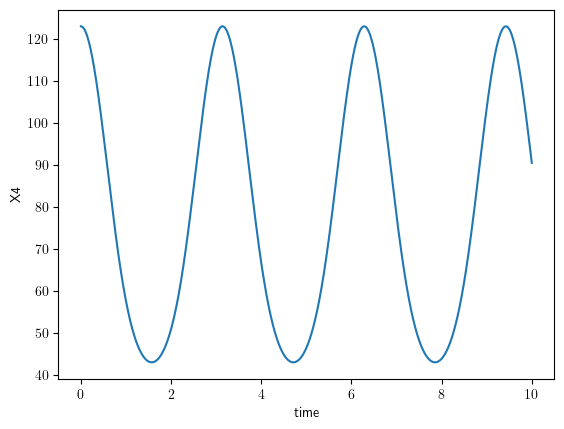

In [31]:
plt.plot(sols1.t, sols1.y[2])
plt.xlabel('time')
plt.ylabel('X4')